# 1)Importing Libraries

Importing the OS module for changing working Directory.

chdir method in OS module changes the current directory to thedirectory containing data set that I will use for the demo.

PANDAS,NUMPY for data manuplation.
 
Matplotlib,seaborn module for Data Visualisation.    

statsmodels for modelling
                                                                       


In [45]:
import os

data_dir ='C:\\Users\\Keerthi\\Desktop\\Jigsaw\\10 UC-Advance Analytics & Machine Learning\\03-Supplementary Material\\data_week_2'
os.chdir(data_dir)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm


Within this directory 'data_dir' there is a file called boston.csv                                                              
I will read this file using read_csv method in the PANDAS module and after I have created a PANDAS data frame   
Shape method in pandas module helps in knowing the number of rows ans coulmns present in the data  
I will take a look at the columns,dtypes of this data set               

# 2) Reading Dataset

In [5]:
boston = pd.read_csv('boston.csv')
print('Shape of the Dataset-->',boston.shape)
print ('Columns names -->',boston.columns)
print ('Columns Datatype -->', boston.dtypes)



Shape of the Dataset--> (506, 10)
Columns names --> Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PT', 'B', 'MV'], dtype='object')
Columns Datatype --> CRIM     float64
INDUS    float64
NOX      float64
RM       float64
AGE      float64
DIS      float64
TAX        int64
PT       float64
B        float64
MV       float64
dtype: object


### (a)Renaming Columns

Rename method in pandas help in renaming the preditors name 

In [6]:
#Rename the columns Appropriate 
boston=boston.rename(columns=
                     {'CRIM':'Crime_Rate','INDUS':'NonRetail_Business','AGE':"Age",'TAX':'Tax',
                      'RM':'Number_Rooms','DIS':'Distance','PT':"Pupil_Teacher_Ratio",'B':'Blacks_Ratio','MV':'Mean_Price'})

I will use the head method to take a look at the first few observations of this data set

In [7]:
boston.head(5)

,Crime_Rate,NonRetail_Business,NOX,Number_Rooms,Age,Distance,Tax,Pupil_Teacher_Ratio,Blacks_Ratio,Mean_Price
0,0.00632,2.31,0.538,6.575,65.199997,4.0900,296,15.300000,396.899994,24.000000
1,0.02731,7.07,0.469,6.421,78.900002,4.9671,242,17.799999,396.899994,21.600000
2,0.02729,7.07,0.469,7.185,61.099998,4.9671,242,17.799999,392.829987,34.700001
3,0.03237,2.18,0.458,6.998,45.799999,6.0622,222,18.700001,394.630005,33.400002
4,0.06905,2.18,0.458,7.147,54.200001,6.0622,222,18.700001,396.899994,36.200001


# (3)Preparing the data for training the model



### (a) Dividing the given dataset into predictors and response

X = All other features

Y = Boston Housing Price(Mean_price)

In [8]:
predictors=boston.drop("Mean_Price", axis=1)
response=boston['Mean_Price']


### (b)Splitting the data into training and testing sets


We can use model_selection from Scikit Learn module to split the dataset into train and test datasets.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors, response, test_size = 0.2,random_state=590)

Within this model selection module, there is a train test split method which helps us in dividing a dataset into training and testing component

	
test size - it talks about what should be the size of the test dataset relative to the total dataset.

Supplying 0.20 test_size will create a test dataset which is 20% and training dataset of 80% of total dataset


In [11]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(404, 9)
(404,)
(102, 9)
(102,)


# 4) Data preprocessing of Training Dataset
 For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner.We will have to check for the following                                                                                      (i) Missing values                                                                                                                 (ii) Outliers 

### a)Missing Values


In [12]:
X_train.isnull().sum()


Crime_Rate             0
NonRetail_Business     0
NOX                    0
Number_Rooms           0
Age                    0
Distance               0
Tax                    0
Pupil_Teacher_Ratio    0
Blacks_Ratio           0
dtype: int64

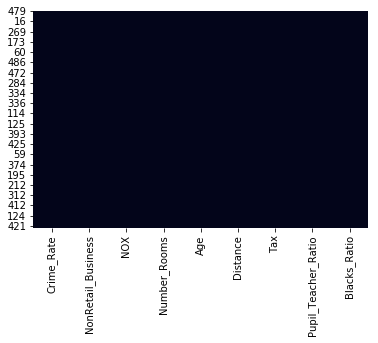

In [13]:
sns.heatmap(X_train.isnull(), cbar=False)

### Observations:

There are no missing values in this dataset.

### (b) Summary Statistics


summary statistics can be created for pandas dataframe using describe method 

In [14]:
print(X_train.describe())


       Crime_Rate  NonRetail_Business         NOX  Number_Rooms         Age  \
count  404.000000          404.000000  404.000000    404.000000  404.000000   
mean     3.712051           11.086733    0.554920      6.278079   68.927228   
std      9.262679            6.885411    0.116843      0.678183   27.919917   
min      0.006320            0.460000    0.385000      3.863000    6.200000   
25%      0.079340            5.175000    0.452000      5.888750   45.074999   
50%      0.260420            8.560000    0.538000      6.189000   77.750000   
75%      3.202962           18.100000    0.624000      6.576000   94.150000   
max     88.976196           27.740000    0.871000      8.780000  100.000000   

         Distance         Tax  Pupil_Teacher_Ratio  Blacks_Ratio  
count  404.000000  404.000000           404.000000    404.000000  
mean     3.803905  402.141089            18.470792    358.116359  
std      2.117967  166.080603             2.173136     89.405276  
min      1.129600  1

### (c)Exploratory Data Analysis


###### Plotting Predictors Vs Target variable

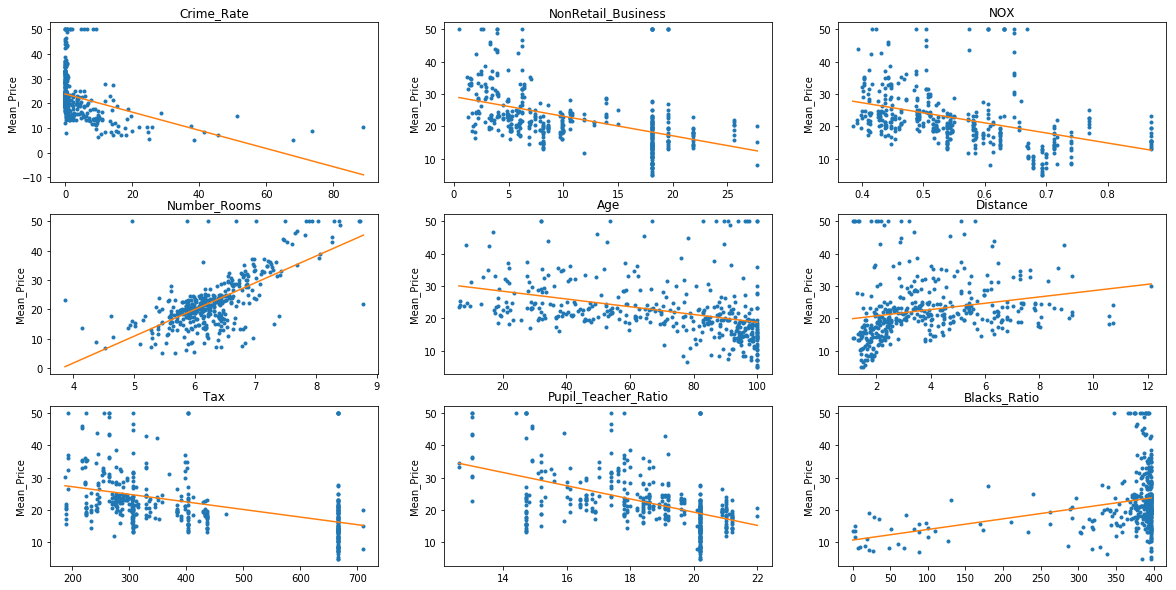

In [15]:

plt.figure(figsize=(20, 10))
X=X_train
Y= Y_train
# i: index
for i, col in enumerate(X.columns):
    plt.subplot(3, 3, i+1)
    x = X_train[col]
    y = Y
    plt.plot(x, y, '.')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
   # plt.xlabel(col)
    plt.ylabel('Mean_Price')

### Observations:

We Observe that we have less percent contribution from outliers in the data and we can ignore as the size of dataset is less 

### d)Outliers Values


In [16]:
#percentile of each Predictors
X_train.quantile([0.01,.05,.10,.15 ,.25,.5,.8,.85,0.9,.95,.99,1])


,Crime_Rate,NonRetail_Business,NOX,Number_Rooms,Age,Distance,Tax,Pupil_Teacher_Ratio,Blacks_Ratio
0.01,0.013606,1.382700,0.39800,4.62872,8.415000,1.204884,188.0,13.000000,7.729200
0.05,0.027358,2.180000,0.40915,5.36620,18.844999,1.455615,222.0,14.700000,88.323997
0.10,0.037149,2.956000,0.42600,5.59850,27.760000,1.613730,233.0,14.800000,298.791000
0.15,0.049999,3.689500,0.43590,5.73330,32.200001,1.799570,254.0,15.600000,346.246504
0.25,0.079340,5.175000,0.45200,5.88875,45.074999,2.102875,277.0,17.000000,376.462509
0.50,0.260420,8.560000,0.53800,6.18900,77.750000,3.267450,329.0,19.050000,391.575012
0.80,4.975000,18.100000,0.65660,6.71940,95.739999,5.496100,666.0,20.200001,396.899994
0.85,8.011151,18.100000,0.69300,6.85730,97.455001,6.270000,666.0,20.200001,396.899994
0.90,10.653840,19.580000,0.71300,7.08530,98.870002,6.814700,666.0,20.970000,396.899994
0.95,16.671190,21.889999,0.77000,7.48615,100.000000,7.827800,666.0,21.000000,396.899994


### BoxPlots of Predictors

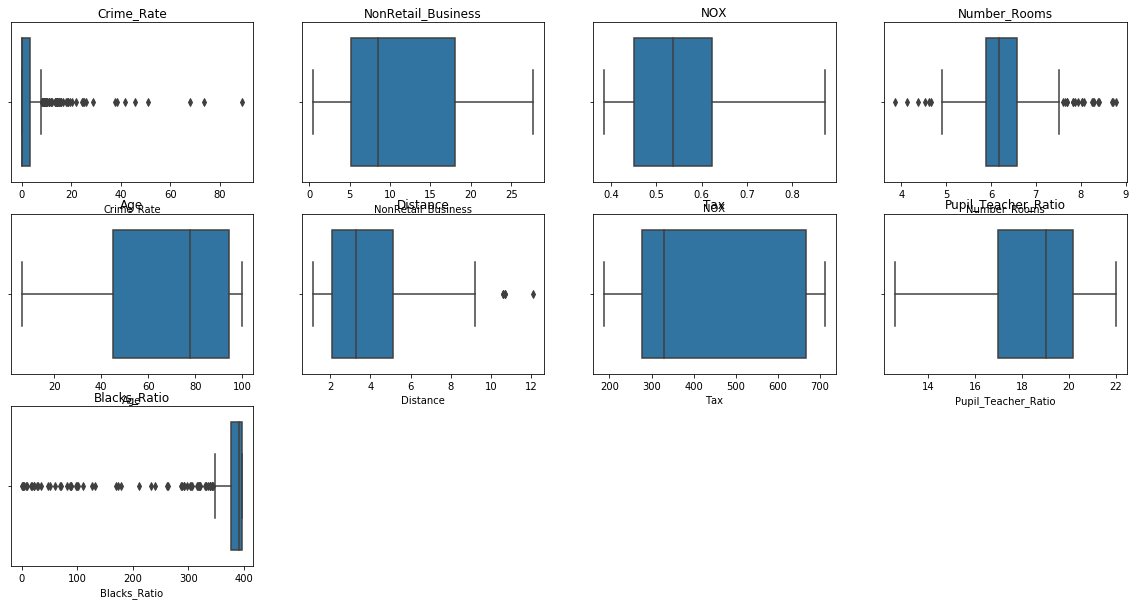

In [17]:
plt.figure(figsize=(20, 10))
X=X_train
# i: index
for i, col in enumerate(X.columns):
    plt.subplot(3, 4, i+1)
    x = X_train[col]
    sns.boxplot(x)
    plt.title(col)


### Observations

Crime_Rate : we observe that most of the outliers data is above at 95 percentile ,so we are capping the values more than 8 to 8

Number_Rooms : We see that the relation between Mean_Price and Number_rooms is linear and the values are in the range (4,9),so we are not applying the outlier treatment.

Distance:we observe that most of the outliers data is above at 99 percentile ,so we are capping the values more than 9 to 9

Pupil_Teacher_Ratio : we Observe that most outliers lie below the 5 percentile, so we are applying floor to values which are less than 14 to 14

Blacks_Ratio: We observe that most outliers are concentrated below 5 percentile, so we are applying floor to values which are less than 300 to 300

### Managing Outliers through Flooring(5 percentile) and Capping (95 percentile)

In [46]:

X_train['Crime_Rate'] = X_train['Crime_Rate'].apply(lambda x: 15 if x > 15 else x)
X_train['Distance'] = X_train['Distance'].apply(lambda x: 9 if x > 9 else x)
X_train['Pupil_Teacher_Ratio'] = X_train['Pupil_Teacher_Ratio'].apply(lambda x: 14 if x < 14 else x)
X_train['Blacks_Ratio'] = X_train['Blacks_Ratio'].apply(lambda x: 84 if x < 84 else x)


### After Managing Outliers-BoxPlots of Predictors

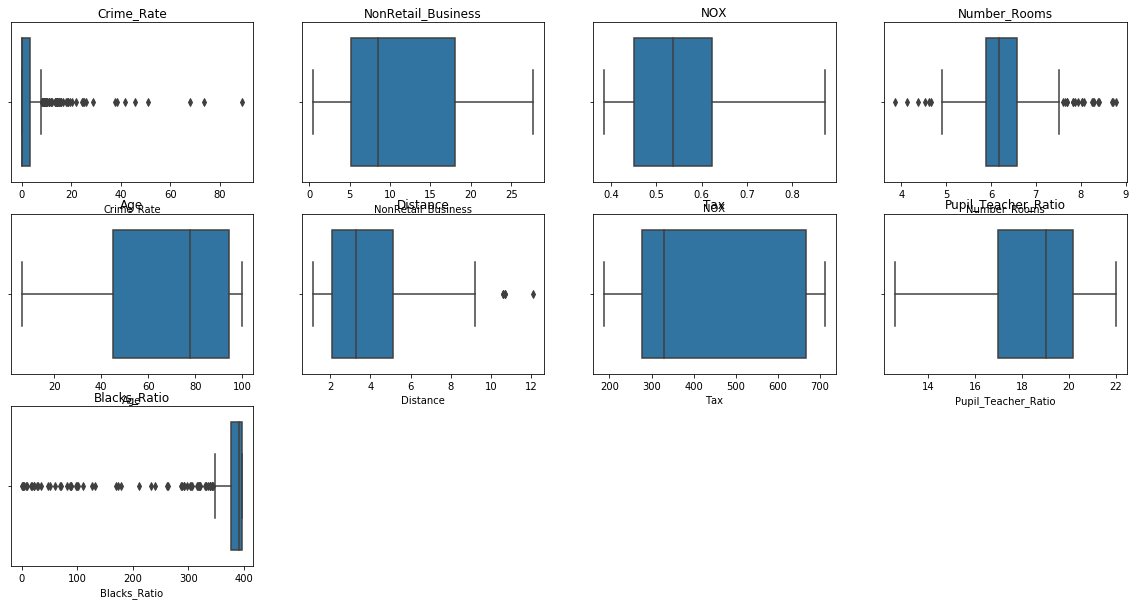

In [18]:

plt.figure(figsize=(20, 10))
X=X_train
# i: index
for i, col in enumerate(X.columns):
    plt.subplot(3, 4, i+1)
    x = X_train[col]
    sns.boxplot(x)
    plt.title(col)
  

### (e) Visualizing Data with Pairs Plots 

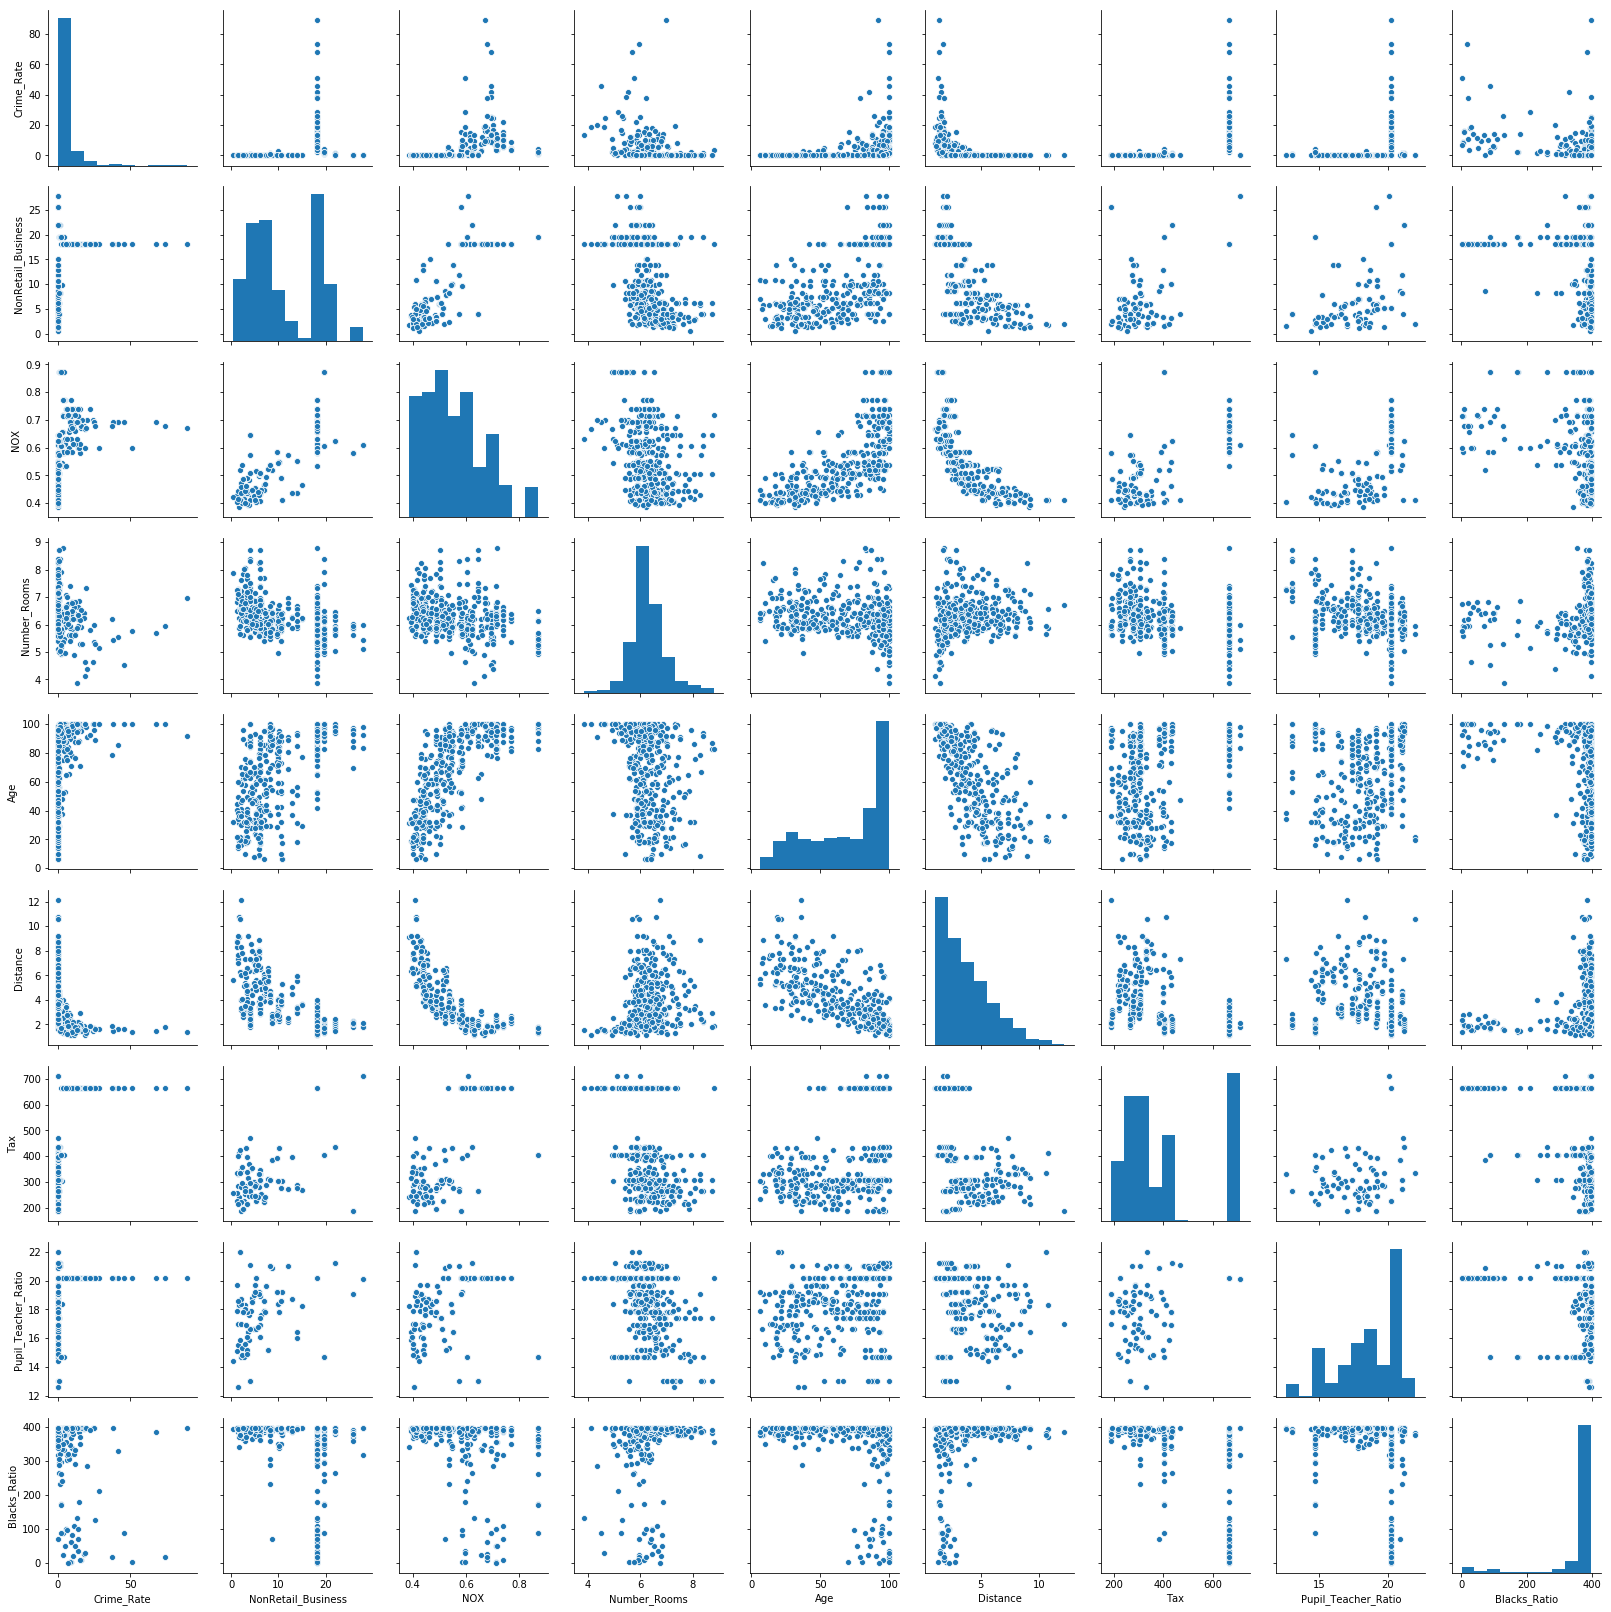

In [19]:
sns.pairplot(X_train)
plt.show()
  

### (f) Visualizing Target variable Distribution

C:\Users\Keerthi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


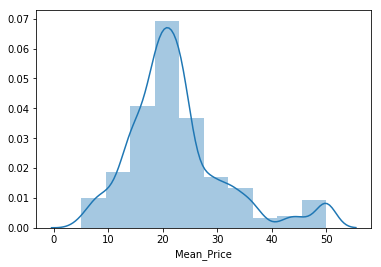

In [21]:
sns.distplot(Y_train, bins=10)
plt.show()


### Observations:

We see that the values of target variable 'Mean_price' is distributed normally with few outliers.                                                                              
Hence, we can perform a LINEAR REGRESSION to predict the values



### (g)Correlation Matrix

we create a correlation matrix that measures the linear relationships between the variables.

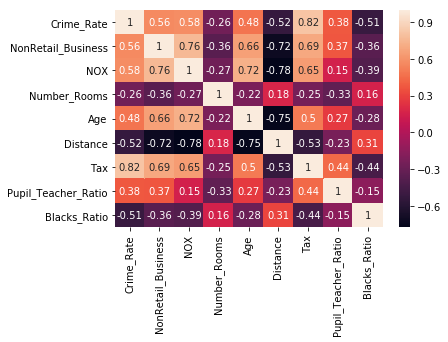

In [22]:
correlation_matrix = X_train.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)


### Observations:

 Rooms_NO has a high positive correlation with Mean_Price (0.7) .                                      
 The more the value of Rooms_NO, the more will be the value of 'Mean_Price'. Because it's pretty evident that with increase in the number of rooms, the price of the house will increase.

Pupil_Teacher_Ratio has high negatively correlation with Mean_price(-0.51)
The lesser the value of Pupil_Teacher_Ratio, the more will be the value of 'Mean_price'. Because if the students to teacher ratio is low, then that means individual students gets much more attention from the teacher as opposed to a region where this ratio is high. 

    

# (4)Preparing the training data for Linear Regression



### (a)Add the constant term to the training data
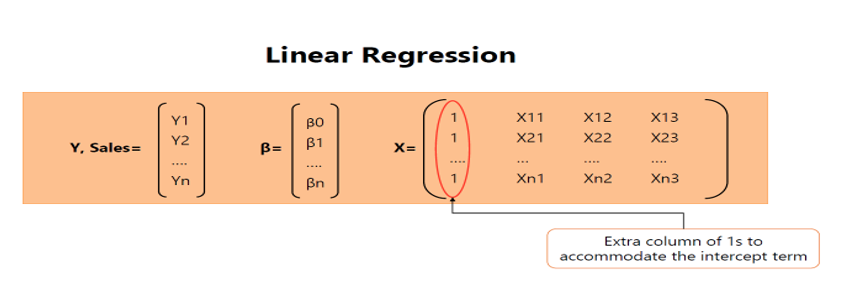

In [23]:
X_train = sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

# (5)Build a linear regression model 

In [24]:
X_train.columns

Index(['const', 'Crime_Rate', 'NonRetail_Business', 'NOX', 'Number_Rooms',
       'Age', 'Distance', 'Tax', 'Pupil_Teacher_Ratio', 'Blacks_Ratio'],
      dtype='object')

### BACKWARD selection regression

### Building the model on training dataset with all predictors

### (a)Fit the Ordinary Least Square Model

In [25]:
#we will build a linear regression object from X_train and Y_train
model_all = sm.OLS(Y_train, X_train)

The model_all estimator instance is fitted to the model; This is done by passing our training set to the fit method.

In [26]:
result_all = model_all.fit()


### Print the Model Summary

print model summary

In [27]:
 print(result_all.summary())

                            OLS Regression Results                            
Dep. Variable:             Mean_Price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     77.03
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           2.85e-81
Time:                        11:23:35   Log-Likelihood:                -1258.8
No. Observations:                 404   AIC:                             2538.
Df Residuals:                     394   BIC:                             2578.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  17.3907    

### Observations

Non-Significant Predictors :

    We can observe that 'NonRetail_Business' (P-value=28.9%) and 'TAX' (P-Value = 28%) are not significant at confindence   level of 95% , as they are having P-values more than Significant level of 5%
    The Probability boundaries include zero for predictors NonRetail_Business ,TAX 

    Hence we can conclude that the NonRetail_Business ,TAX doesn't play a significant role in predict housing values in Boston and can be dropped.

Significant Predictors :

    It is evident from very low P-value that the predictors 'Crime_Rate', 'NOX', 'Number_Rooms', 'AGE' ,'Distance' ,'Pupil_Teacher_Ratio', 'Blacks_Ratio' are significant in predicting the mean price of the houses in Boston



## Removing Predictors which are not significant 

##### Let's now test the model by dropping the NonRetail_Business ,TAX variables and use other predictors in data to predict the housing values in Boston.

In [28]:
X_train = X_train.drop(['NonRetail_Business','Tax'], axis=1)

In [29]:
model_result_1 = sm.OLS(Y_train, X_train)
result_final = model_result_1.fit()
print(result_final.summary())

                            OLS Regression Results                            
Dep. Variable:             Mean_Price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     98.87
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           6.71e-83
Time:                        11:23:44   Log-Likelihood:                -1259.7
No. Observations:                 404   AIC:                             2535.
Df Residuals:                     396   BIC:                             2567.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  16.4656    

### DEFINATIONS:

R2:The R2 will always increase as more variables are included in the model. 

Adjusted R2:Adjusted R2 is the preferred measure as it adjusts for the number of predictors in the model.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance.

F-Statistic :F-statistic is a good indicator of whether there is a relationship between our predictor and the response variables.The farther the F-statistic is from 1 the better it is.

Log-Likelihood :Higher the Log-Likelyhood ,the better the model is as 

AIC: Lower indicates a more parsimonious the model is 

BIC:Like Adjusted R2, BIC penalises the log-likelyhood for higher number of predictors



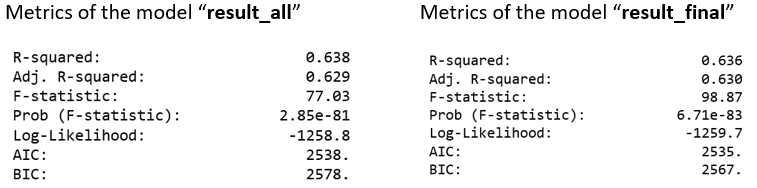

### Observations

Comparing the metrics of models "result_all", "result_final",

In "result_final" model we can observe:

R2 value has very slightly decreased, 
 
Adjusted R2 value has increased slightly 

F-statistic has increased considerable number

Log-Likelihood is also increased.

AIC has decreased.

BIC has also decreased.

Further, the p-values of all the predictors are far less than the signifincant value of 5%. So at 95% confident level ,all the predictors in the model are significant in predicting the Mean_Price

This confirms that the NonRetail_Business ,TAX predictors arent significant in calculating the price of houses in Boston and we are going in right direction in modelling.

The sign of beta coeffiecnts intution supports the correlation coefficients


### Intuition of Significant Coefficents:
    
'Crime_Rate': -0.1764

         we know that the price of house increases in region where there is low crime rate. This is suppoted by the -ve sign of the coefficient i.e they are negatively correlated

'NOX': -20.24           
    The Nitric Oxide has high impact in decreasing price of House as it sideeffects on the health

'Number_Rooms: 6.8
       It is evident from high postive number that as the number of rooms increase the price of house increases.

 'AGE': -0.0561
        As the age of house increase the price decreases and the coefficient just supports this

'Distance': -1.456
        As the distance of the house increase from employment centres, the price will decrease. The same is suppported with the  sign and the magnitude of the coefficient

'Pupil_Teacher_Ratio': -1.0983
    The lesser the value of Pupil_Teacher_Ratio, the more will be the value of 'Mean_price'. Because if the students to teacher ratio is low, then that means individual students gets much more attention from the teacher as opposed to a region where this ratio is high. 

 'Blacks_Ratio' : 0.0128
        As the magnitude of coefficent is small compared to other ceofficents ,the impact of Blacks_ratio of the Mean price of house is very low

    

### Histogram of residuals

C:\Users\Keerthi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


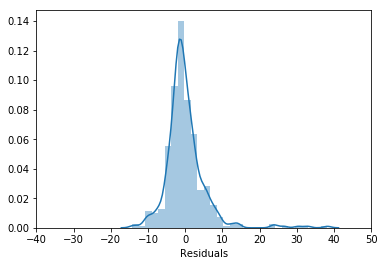

In [30]:
sns.distplot(result_final.resid, bins=30)
plt.xlabel('Residuals')
plt.xlim(-40,50)
plt.show()

The residuals follow the normal distribution.We can also observe that right tail is elongated as compared to the left tail. Right skewed

In [ ]:
sm.qqplot((residualscook),color='brown',line='s')

# 6) Scoring the Model

### Data preprocessing
 For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner.We will have to check for the following                                                                                      (i) Missing values                                                                                                                 (ii) Outliers

### a)Missing Values


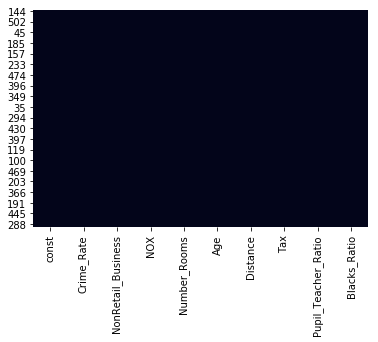

In [31]:
sns.heatmap(X_test.isnull(), cbar=False)

### Observations:

There are no missing values in this dataset.

### (b) Summary Statistics


summary statistics can be created for pandas dataframe using describe method 

In [32]:
print(X_test.describe())


       const  Crime_Rate  NonRetail_Business         NOX  Number_Rooms  \
count  102.0  102.000000          102.000000  102.000000    102.000000   
mean     1.0    3.223276           11.335000    0.553805      6.310598   
std      0.0    5.234584            6.790165    0.112531      0.795188   
min      1.0    0.010960            0.740000    0.389000      3.561000   
25%      1.0    0.085012            5.222500    0.448000      5.841250   
50%      1.0    0.225180           10.010000    0.535000      6.276000   
75%      1.0    4.776305           18.100000    0.647000      6.736250   
max      1.0   23.648199           27.740000    0.871000      8.337000   

              Age    Distance         Tax  Pupil_Teacher_Ratio  Blacks_Ratio  
count  102.000000  102.000000  102.000000           102.000000    102.000000  
mean    67.179412    3.759940  432.382353            18.395098    350.961273  
std     29.136916    2.066346  176.715638             2.141730     98.683376  
min      2.900000

### c)Outliers Values


### Managing Outliers through Flooring(5 percentile) and Capping (95 percentile)

In [33]:

X_test['Crime_Rate'] = X_test['Crime_Rate'].apply(lambda x: 15 if x > 15 else x)
X_test['Distance'] = X_test['Distance'].apply(lambda x: 9 if x > 9 else x)
X_test['Pupil_Teacher_Ratio'] = X_test['Pupil_Teacher_Ratio'].apply(lambda x: 14 if x < 14 else x)
X_test['Blacks_Ratio'] = X_test['Blacks_Ratio'].apply(lambda x: 84 if x < 84 else x)


## (d)Preparing the test data for test the Prediction

### (i)Add the constant term to the test data


In [34]:
X_test = sm.add_constant(X_test)


### (ii)Dropping the predictors which proved to not significant in predicting the Mean price of house in Test dataset.

In [35]:
X_test = X_test.drop(['NonRetail_Business','Tax'], axis=1)

### (iii) Predicting the Mean Price of houses in Boston in Test dataset

In [36]:
Y_Pred = result_final.predict(sm.add_constant(X_test))

# 7) Validation of the Model

### a)Model Evaluation (Actual Vs Predicted) on test sample

We will evaluate our model using error metrics like :                                        
mean_absolute_error,                                                                                                                   
mean_squared_error,                                                                                                                     
R2_score,                                                                                                                  T-test,
F-Test


	In Scikit learn we have a metrics module that can help figure out and calculate the accuracy metrics for any classifier or any regression model  	

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
mean_squared_error(Y_test, Y_Pred)
mean_absolute_error(Y_test, Y_Pred)
print('mean_squared_error is  -->',mean_squared_error(Y_test, Y_Pred))
print('mean_absolute_error is -->',mean_absolute_error(Y_test, Y_Pred))


mean_squared_error is  --> 24.679454863882395
mean_absolute_error is --> 3.559726143626714


### Goodness of Fit

In [40]:
r2_score(Y_test, Y_Pred)

print('R-Square is-->',r2_score(Y_test, Y_Pred))

R-Square is--> 0.7351425559477631


### Observations

That means that the model doing great linear model as less MAE and good R-Square value 



### Actual values Vs Predicted values

###### To visualize the differences between actual prices and predicted values, a scatter plot is created

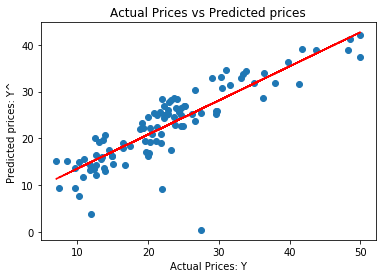

In [41]:
x=Y_test
y=Y_Pred
plt.scatter(x, y)
plt.xlabel("Actual Prices: Y")
plt.ylabel("Predicted prices: Y^")
plt.title("Actual Prices vs Predicted prices")
# Plotting the Best fit line

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

Ideally, the scatter plot should create a linear line. Since the model does not fit 100%, the scatter plot is not creating a linear line.



### T-Test

In [42]:
from scipy import stats
t_statistic, pvalues =stats.ttest_ind(Y_test, Y_Pred)
print('t-statistic -->',t_statistic)
print('P-value -->',pvalues)


t-statistic --> -0.06758884981390681
P-value --> 0.94617978450853


 95% of p-value suggest that the difference between mean of Actual and the Predicted values is close to zero 


### F-test

In [43]:
f_statistic, pvalues =stats.f_oneway(Y_test, Y_Pred)
print('f-statistic -->',f_statistic)
print('P-value -->',pvalues)

f-statistic --> 0.004568252619167114
P-value --> 0.9461797845084421


F-statistic suggest that the variance of error is random and is in acceptable range with 95% confidance interval

## Summary

The output of linear regression at 95% confident level have 8 model variables. The model on train dataset have good R2 value suggest the goodness of fit.This is futher tested on the test sample.

In test sample R-square ,T-test, F-test were performed to measure the model performance in terms of goodness of fit & randomness of variance between actual and the predicted values.

    In summary ,the model goodness of fit on train sample and performance of model on test sample  are in acceptable range.  The final model parameters are tabled below
